In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [25]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Kantar\melb_data.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [26]:
print("Shape of Data", df.shape)
df.columns

Shape of Data (13580, 21)


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [28]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [29]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [30]:
df.isna().sum()/len(df)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

In [31]:
print(df.isna().any(axis = 1).sum()/len(df))
df.isna().any(axis = 1).sum()

0.543740795287187


7384

In [32]:
# Count of numerical and non-numerical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Number of non-numerical columns: {len(cat_cols)}")

print("\nNumerical columns:")
print(num_cols.tolist())

print("\nNon-numerical columns:")
print(cat_cols.tolist())


Number of numerical columns: 13
Number of non-numerical columns: 8

Numerical columns:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

Non-numerical columns:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [33]:
# Display number of unique entries in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Suburb: 314 unique values
Address: 13378 unique values
Rooms: 9 unique values
Type: 3 unique values
Price: 2204 unique values
Method: 5 unique values
SellerG: 268 unique values
Date: 58 unique values
Distance: 202 unique values
Postcode: 198 unique values
Bedroom2: 12 unique values
Bathroom: 9 unique values
Car: 11 unique values
Landsize: 1448 unique values
BuildingArea: 602 unique values
YearBuilt: 144 unique values
CouncilArea: 33 unique values
Lattitude: 6503 unique values
Longtitude: 7063 unique values
Regionname: 8 unique values
Propertycount: 311 unique values


# ---- Modelling N/A removed data ----

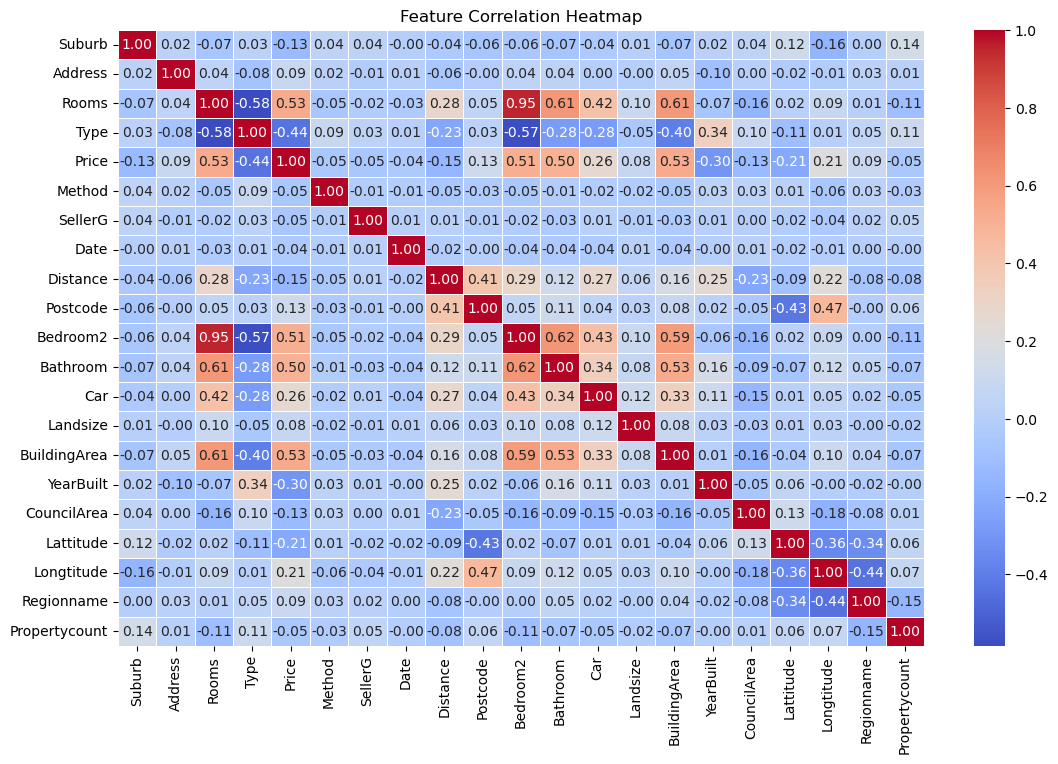

In [34]:
df_removed = df.dropna()
df_encoded = df_removed.copy()
label_enc = LabelEncoder()

# Loop through all non-numeric columns and encode them
for col in df_encoded.select_dtypes(exclude=['number']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))

corr = df_encoded.corr(numeric_only=False)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
"""
Since, correlation cofficients between is high we can just drop these coloumns
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Also, Note their number is high so cant the drop the points

Columns ["Address", "Date", "SellerG"] doesnt seem correlated, sholdn't have much effect on price
-- so its better to drop it

Note: Method is also correlated but I didn't remove it
For removing I also looked at unique value all three has large number of unique values and are less correlated
I decided based on encoding process and corr
"""

'\nSince, correlation cofficients between is high we can just drop these coloumns\nCar              0.004566\nLandsize         0.000000\nBuildingArea     0.474963\nYearBuilt        0.395803\nCouncilArea      0.100810\nAlso, Note their number is high so cant the drop the points\n\nColumns ["Address", "Date", "SellerG"] doesnt seem correlated, sholdn\'t have much effect on price\n-- so its better to drop it\n\nNote: Method is also correlated but I didn\'t remove it\nFor removing I also looked at unique value all three has large number of unique values and are less correlated\nI decided based on encoding process and corr\n'

In [36]:
non_num_cols = ["Regionname","CouncilArea","YearBuilt","Postcode", "Suburb", "Type", 'Method', 'Propertycount']
num_cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude']
drop_cols = ["Address", "Date", "SellerG"]

df_removed = df_removed.drop(columns = drop_cols)
for col in non_num_cols:
    print(f"\n--- {col} ---")
    print(df_removed[col].unique()[:10]) 


--- Regionname ---
['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']

--- CouncilArea ---
['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse']

--- YearBuilt ---
[1900. 2014. 1910. 1890. 2005. 2009. 1880. 1985. 1970. 2013.]

--- Postcode ---
[3067 3042 3206 3078 3018 3025 3143 3032 3147 3034]

--- Suburb ---
['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood']

--- Type ---
['h' 'u' 't']

--- Method ---
['S' 'SP' 'VB' 'PI' 'SA']

--- Propertycount ---
[4019 3464 3280 2211 5301 5132 4836 6567 3052 2894]


In [37]:
num_cols_y = ['Price', 'Distance', 'Landsize', 'BuildingArea']

# Compute Z-scores for selected numerical columns
z_scores = df_removed[num_cols_y].apply(zscore)

# Flag outliers where |Z| > 6
outliers = (z_scores.abs() > 6)

# Count number of outliers in each column
outlier_counts = outliers.sum()
print("Number of outliers in each numerical column:")
print(outlier_counts)

# Count unique rows that have at least one outlier
rows_with_outliers = outliers.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()
print(f"\nNumber of rows containing at least one outlier: {num_rows_with_outliers}")
print("percentage of outlier in data = ",num_rows_with_outliers/len(df_removed))

Number of outliers in each numerical column:
Price           11
Distance         8
Landsize        22
BuildingArea    14
dtype: int64

Number of rows containing at least one outlier: 55
percentage of outlier in data =  0.008876694641704326


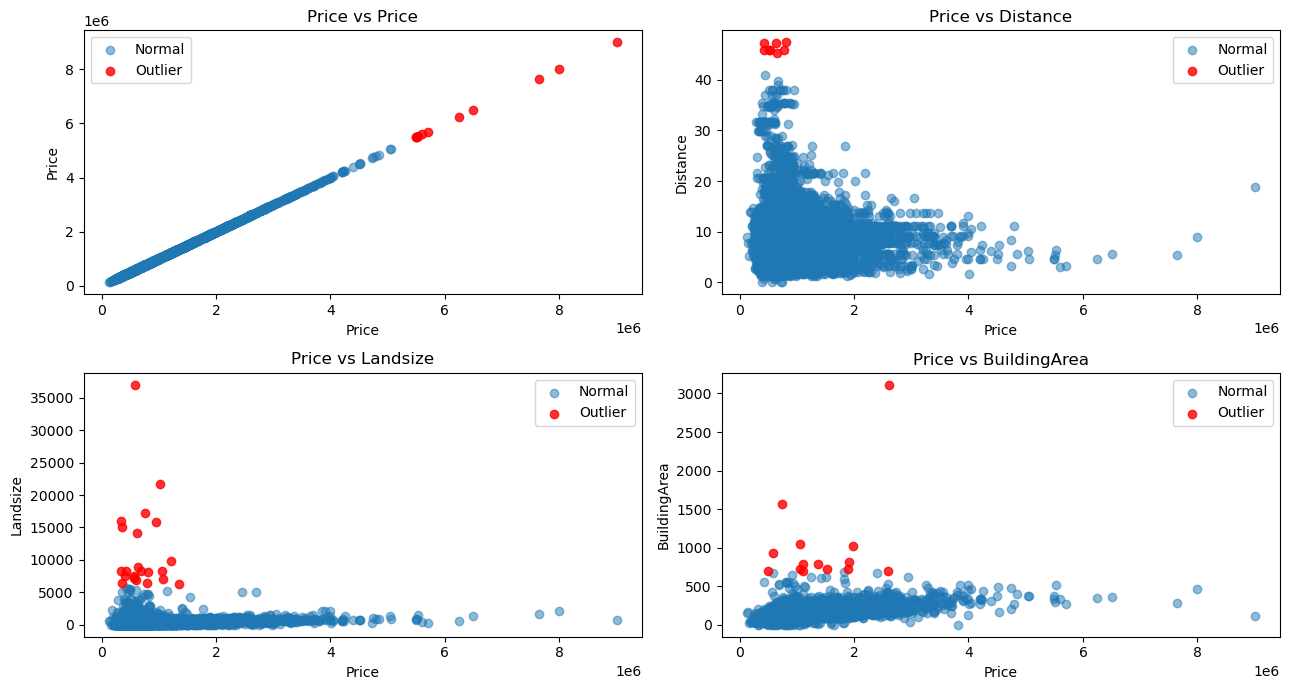

In [38]:
num_cols_y = ['Price', 'Distance', 'Landsize', 'BuildingArea']
plt.figure(figsize=(13, 7))

for i, col in enumerate(num_cols_y):
    plt.subplot(2, 2, i + 1)
    
    # Normal points
    plt.scatter(df_removed['Price'][~outliers[col]], df_removed[col][~outliers[col]], 
                alpha=0.5, label='Normal')
    
    # Outliers
    plt.scatter(df_removed['Price'][outliers[col]], df_removed[col][outliers[col]], 
                color='red', alpha=0.8, label='Outlier')
    
    plt.xlabel('Price')
    plt.ylabel(col)
    plt.title(f'Price vs {col}')
    plt.legend()

plt.tight_layout()
plt.show()


In [39]:
# Remove rows that have any outlier in selected columns

print("Original dataframe shape:", df_removed.shape)
df_no_outliers= df_removed.loc[~outliers.any(axis=1)].copy()
print("Dataframe shape after removing outliers:", df_no_outliers.shape)


Original dataframe shape: (6196, 18)
Dataframe shape after removing outliers: (6141, 18)


In [40]:
df_encoded = pd.get_dummies(df_no_outliers, columns=non_num_cols, drop_first=True, dtype=int)
print("Encoded dataframe shape:", df_encoded.shape)
df_encoded.head()

Encoded dataframe shape: (6141, 927)


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Propertycount_14887,Propertycount_14949,Propertycount_15321,Propertycount_15510,Propertycount_15542,Propertycount_16166,Propertycount_17055,Propertycount_17093,Propertycount_17496,Propertycount_21650
1,2,1035000,2.5,2,1,0.0,156,79.0,-37.8079,144.9934,...,0,0,0,0,0,0,0,0,0,0
2,3,1465000,2.5,3,2,0.0,134,150.0,-37.8093,144.9944,...,0,0,0,0,0,0,0,0,0,0
4,4,1600000,2.5,3,1,2.0,120,142.0,-37.8072,144.9941,...,0,0,0,0,0,0,0,0,0,0
6,3,1876000,2.5,4,2,0.0,245,210.0,-37.8024,144.9993,...,0,0,0,0,0,0,0,0,0,0
7,2,1636000,2.5,2,1,2.0,256,107.0,-37.8060,144.9954,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Normalizing features (exclude target 'Price')
features_to_scale = [col for col in num_cols if col != 'Price']
scaler = MinMaxScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

print("Normalization complete ")
df_encoded[features_to_scale + ['Price']].head()

Normalization complete 


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price
1,0.142857,0.060976,0.222222,0.000000,0.0,0.027557,0.116176,0.547073,0.499518,1035000
2,0.285714,0.060976,0.333333,0.142857,0.0,0.023671,0.220588,0.544928,0.500626,1465000
4,0.428571,0.060976,0.333333,0.000000,0.2,0.021198,0.208824,0.548146,0.500293,1600000
6,0.285714,0.060976,0.444444,0.142857,0.0,0.043279,0.308824,0.555501,0.506053,1876000
7,0.142857,0.060976,0.222222,0.000000,0.2,0.045222,0.157353,0.549985,0.501733,1636000


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42
)

### ---------- Regression -----------

In [43]:
reg1_model = ElasticNet(alpha= 0.1, l1_ratio= 0.99, random_state= 42)
reg1_model.fit(X_train, y_train)

# Get top 10 influential features
coef = pd.Series(reg1_model.coef_, index=X_train.columns)
top_features = coef.abs().sort_values(ascending=False).head(10)

print("Top 10 most influential features:")
print(top_features)

Top 10 most influential features:
BuildingArea        1.486658e+06
Bathroom            6.522798e+05
Distance            6.515120e+05
Rooms               5.174015e+05
Car                 4.817013e+05
Landsize            4.318121e+05
YearBuilt_1884.0    3.800521e+05
YearBuilt_1919.0    3.699124e+05
Type_u              3.614271e+05
YearBuilt_1913.0    3.333051e+05
dtype: float64


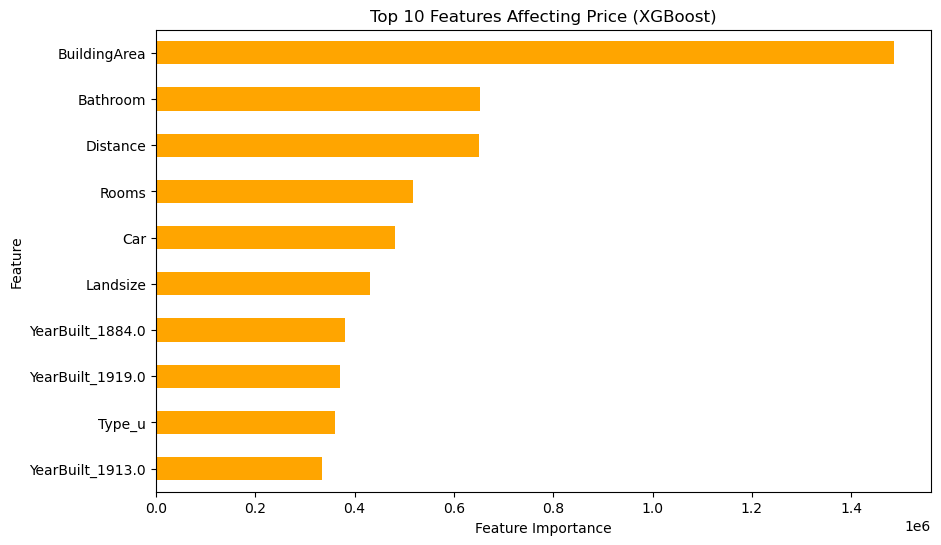

In [44]:
# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Features Affecting Price (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [45]:
y_pred = reg1_model.predict(X_test)

# Standard metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE and MAE as percentage of mean price
rmse_pct = (rmse / y_test.mean()) * 100
mae_pct = (mae / y_test.mean()) * 100

# Print results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ({rmse_pct:.2f}%)")
print(f"MAE: {mae:.2f} ({mae_pct:.2f}%)")
print(f"R² Score: {r2:.3f}")


MSE: 88481781847.64
RMSE: 297458.87 (27.47%)
MAE: 205345.24 (18.97%)
R² Score: 0.776


### ---------------- Random Forest -----------------

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=500, 
    max_depth=None,   
    random_state=42,
    n_jobs=-1   
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

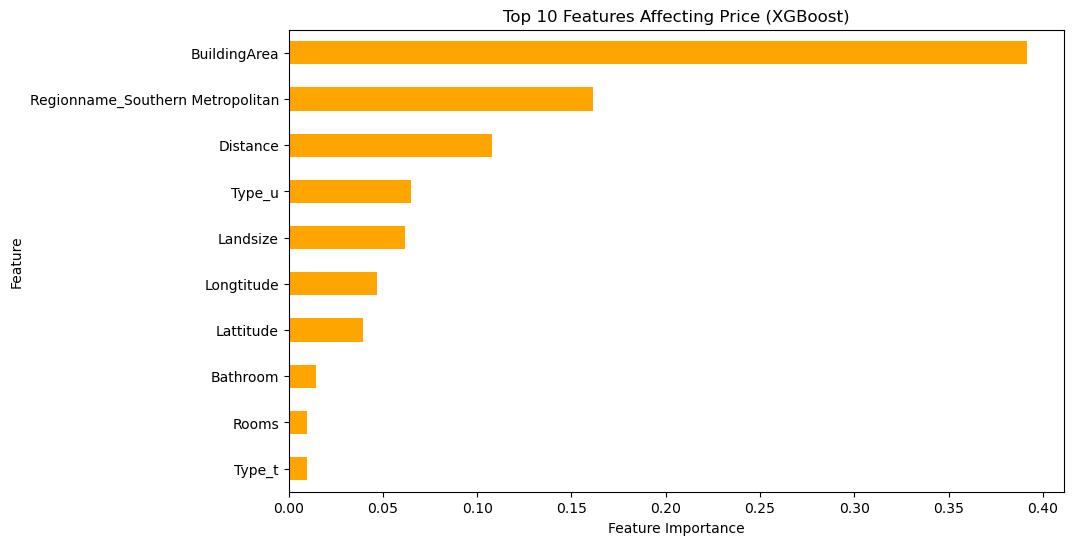

In [47]:
# Get feature importances
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Select top 10 features
top_features = feat_importance.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Features Affecting Price (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [48]:
y_pred_rf = rf_model.predict(X_test)

# Standard metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# RMSE and MAE as percentage of mean price
rmse_pct_rf = (rmse_rf / y_test.mean()) * 100
mae_pct_rf = (mae_rf / y_test.mean()) * 100

# Print results
print(f"Random Forest Regression Results:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f} ({rmse_pct_rf:.2f}%)")
print(f"MAE: {mae_rf:.2f} ({mae_pct_rf:.2f}%)")
print(f"R² Score: {r2_rf:.3f}")

Random Forest Regression Results:
MSE: 52608830684.93
RMSE: 229366.15 (21.18%)
MAE: 142419.60 (13.15%)
R² Score: 0.867


### --------------- XGBoost ----------------

In [49]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

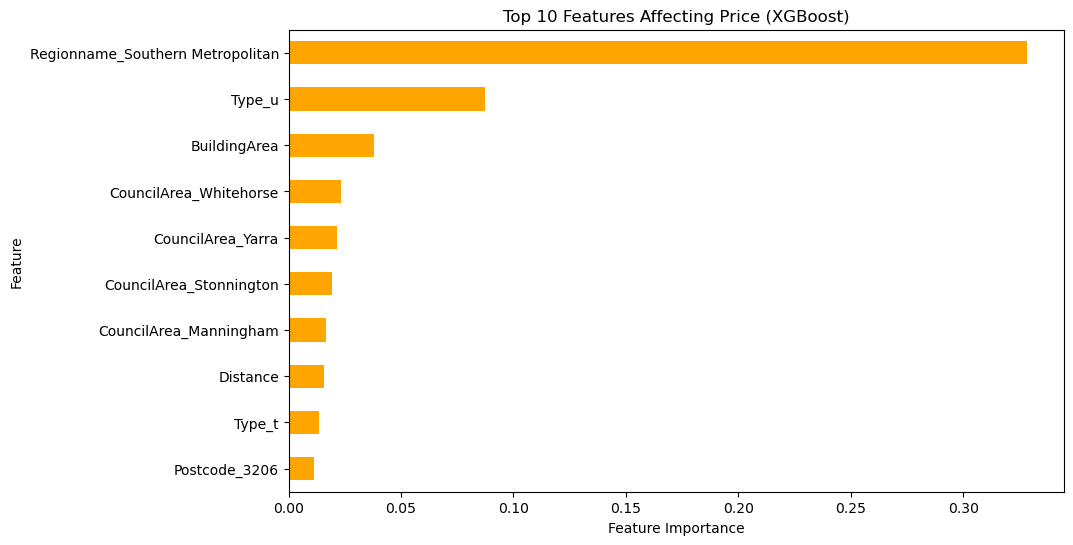

In [50]:
# Get feature importances
feat_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Select top 10 features
top_features = feat_importance.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Features Affecting Price (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [51]:
y_pred_xgb = xgb_model.predict(X_test)

# Standard metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# RMSE and MAE as percentage of mean price
rmse_pct_xgb = (rmse_xgb / y_test.mean()) * 100
mae_pct_xgb = (mae_xgb / y_test.mean()) * 100

# Print results
print(f"XGBoost Regression Results:")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f} ({rmse_pct_xgb:.2f}%)")
print(f"MAE: {mae_xgb:.2f} ({mae_pct_xgb:.2f}%)")
print(f"R² Score: {r2_xgb:.3f}")

XGBoost Regression Results:
MSE: 40173334194.41
RMSE: 200432.87 (18.51%)
MAE: 129693.32 (11.98%)
R² Score: 0.898


# ---- Removing N/A removed data ----

In [52]:
"""
   Column         N/A val      Unique Values
--------------------------------------------- 
Car              0.004566          11 
BuildingArea     0.474963          602
YearBuilt        0.395803          144
CouncilArea      0.100810          33
"""

'\n   Column         N/A val      Unique Values\n--------------------------------------------- \nCar              0.004566          11 \nBuildingArea     0.474963          602\nYearBuilt        0.395803          144\nCouncilArea      0.100810          33\n'

In [53]:
drop_cols = ["Address", "Date", "SellerG"]
df = df.drop(columns = drop_cols)
# Display number of unique entries in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Suburb: 314 unique values
Rooms: 9 unique values
Type: 3 unique values
Price: 2204 unique values
Method: 5 unique values
Distance: 202 unique values
Postcode: 198 unique values
Bedroom2: 12 unique values
Bathroom: 9 unique values
Car: 11 unique values
Landsize: 1448 unique values
BuildingArea: 602 unique values
YearBuilt: 144 unique values
CouncilArea: 33 unique values
Lattitude: 6503 unique values
Longtitude: 7063 unique values
Regionname: 8 unique values
Propertycount: 311 unique values


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_impute = df.copy()

# Columns to impute
cat_impute_cols = ['Car', 'YearBuilt', 'CouncilArea']
num_impute_cols = ['BuildingArea']

# Encode other categorical features for RF input
other_cat_cols = ['Suburb', 'Type', 'Method', 'Regionname', 'Postcode', 'Propertycount']
df_encoded = pd.get_dummies(df_impute[other_cat_cols], drop_first=True)

# Prepare feature dataframe for imputations (exclude target columns)
features_df = pd.concat([df_encoded, df_impute.drop(columns=other_cat_cols + ['Price', 'BuildingArea'] + cat_impute_cols)], axis=1)

# Impute categorical columns using RF Classifier
for col in cat_impute_cols:
    train_idx = df_impute[df_impute[col].notna()].index
    predict_idx = df_impute[df_impute[col].isna()].index

    if not predict_idx.empty:
        # Encode only the non-missing values
        le = LabelEncoder()
        df_impute.loc[train_idx, col] = le.fit_transform(df_impute.loc[train_idx, col].astype(str))
        
        rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
        rf_clf.fit(features_df.loc[train_idx], df_impute.loc[train_idx, col].astype(int))
        
        # Predict missing
        df_impute.loc[predict_idx, col] = rf_clf.predict(features_df.loc[predict_idx])
        
        # Convert back to original labels
        df_impute[col] = le.inverse_transform(df_impute[col].astype(int))

# Impute numerical column using RF Regressor
for col in num_impute_cols:
    train_idx = df_impute[df_impute[col].notna()].index
    predict_idx = df_impute[df_impute[col].isna()].index

    if not predict_idx.empty:
        rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
        rf_reg.fit(features_df.loc[train_idx], df_impute.loc[train_idx, col])
        df_impute.loc[predict_idx, col] = rf_reg.predict(features_df.loc[predict_idx])

print("Imputation complete. Shape:", df_impute.shape)
df_impute.head()

Imputation complete. Shape: (13580, 18)


,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,1480000,S,2.5,3067,2,1,1.0,202,89.707,1900.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,2,h,1035000,S,2.5,3067,2,1,0.0,156,79.000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,SP,2.5,3067,3,2,0.0,134,150.000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,3,h,850000,PI,2.5,3067,3,2,1.0,94,121.669,2004.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,VB,2.5,3067,3,1,2.0,120,142.000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [55]:
# df_impute.to_csv("processed_data.csv")

# Display number of unique entries in each column
for col in df_impute.columns:
    print(f"{col}: {df_impute[col].nunique()} unique values")

Suburb: 314 unique values
Rooms: 9 unique values
Type: 3 unique values
Price: 2204 unique values
Method: 5 unique values
Distance: 202 unique values
Postcode: 198 unique values
Bedroom2: 12 unique values
Bathroom: 9 unique values
Car: 11 unique values
Landsize: 1448 unique values
BuildingArea: 6893 unique values
YearBuilt: 144 unique values
CouncilArea: 33 unique values
Lattitude: 6503 unique values
Longtitude: 7063 unique values
Regionname: 8 unique values
Propertycount: 311 unique values


In [56]:
print(df_impute.shape)
df_impute.isna().sum()

(13580, 18)


Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

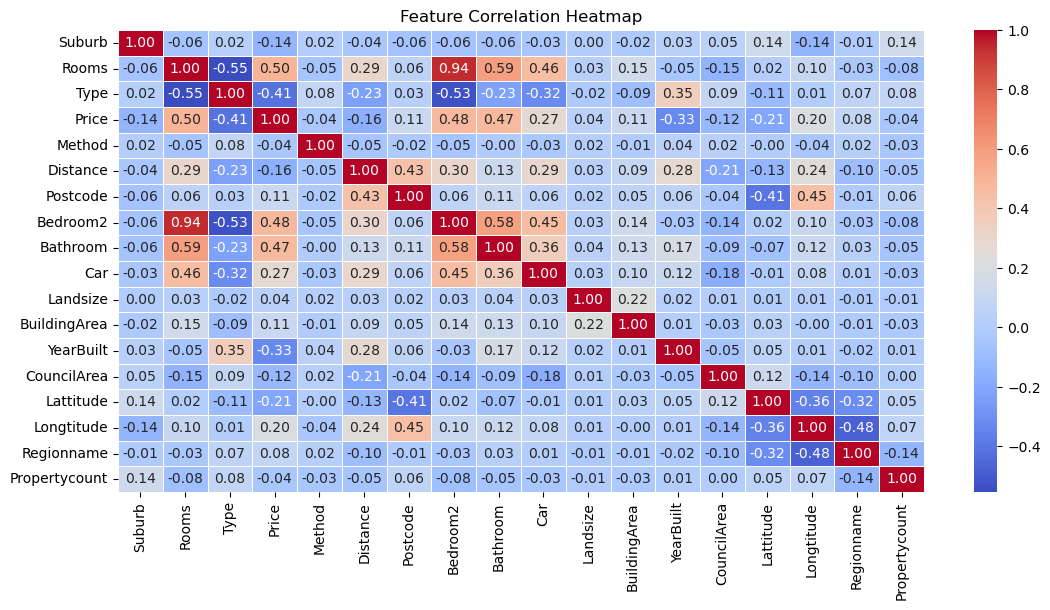

In [57]:
df_encoded = df_impute.copy()
label_enc = LabelEncoder()

# Loop through all non-numeric columns and encode them
for col in df_encoded.select_dtypes(exclude=['number']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col].astype(str))

corr = df_encoded.corr(numeric_only=False)
plt.figure(figsize=(13, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [58]:
from scipy.stats import zscore

num_cols_y  = ['Price', 'Distance', 'Landsize', 'BuildingArea']

# Compute Z-scores for selected numerical columns
z_scores = df_impute[num_cols_y ].apply(zscore)

# Flag outliers where |Z| > 5
outliers = (z_scores.abs() > 5)

# Count number of outliers in each column
outlier_counts = outliers.sum()
print("Number of outliers in each numerical column:")
print(outlier_counts)

# Count unique rows that have at least one outlier
rows_with_outliers = outliers.any(axis=1)
num_rows_with_outliers = rows_with_outliers.sum()
print(f"\nNumber of rows containing at least one outlier: {num_rows_with_outliers}")
print("percentage of outlier in data = ",num_rows_with_outliers/len(df_impute))

Number of outliers in each numerical column:
Price           40
Distance        24
Landsize        11
BuildingArea    10
dtype: int64

Number of rows containing at least one outlier: 78
percentage of outlier in data =  0.0057437407952871875


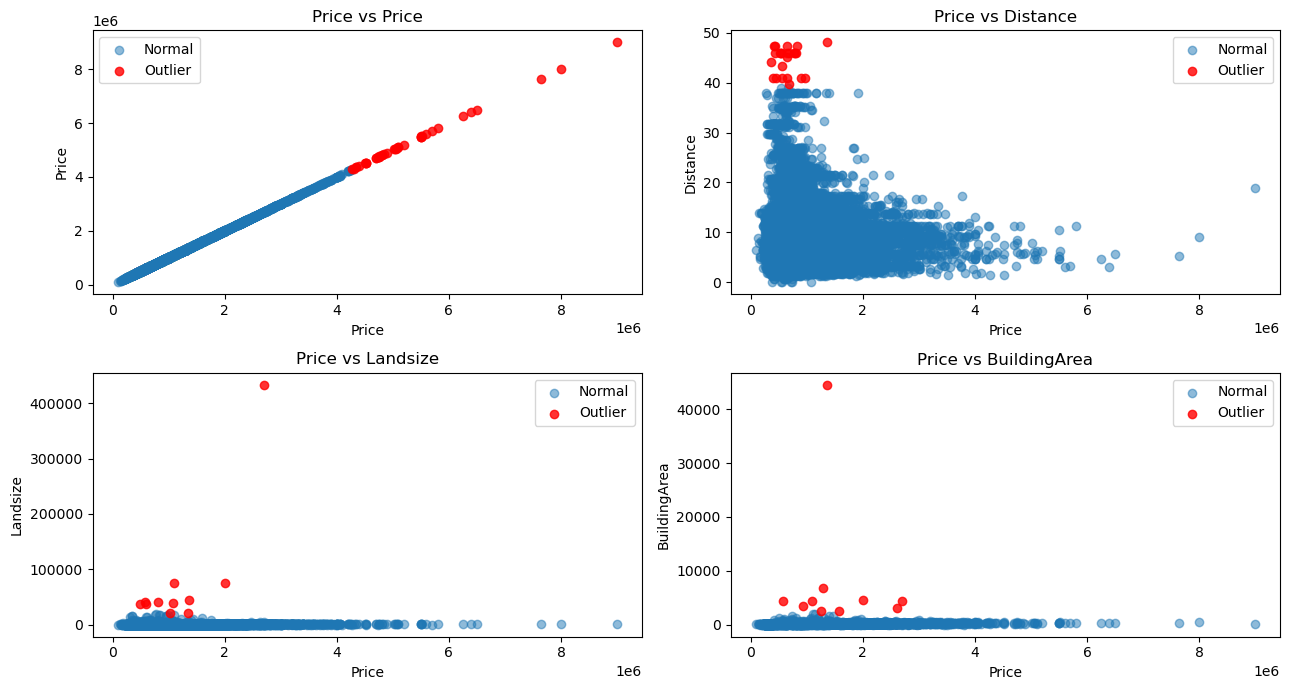

In [59]:
num_cols_y = ['Price', 'Distance', 'Landsize', 'BuildingArea']
plt.figure(figsize=(13, 7))

for i, col in enumerate(num_cols_y):
    plt.subplot(2, 2, i + 1)
    
    # Normal points
    plt.scatter(df_impute['Price'][~outliers[col]], df_impute[col][~outliers[col]], 
                alpha=0.5, label='Normal')
    
    # Outliers
    plt.scatter(df_impute['Price'][outliers[col]], df_impute[col][outliers[col]], 
                color='red', alpha=0.8, label='Outlier')
    
    plt.xlabel('Price')
    plt.ylabel(col)
    plt.title(f'Price vs {col}')
    plt.legend()

plt.tight_layout()
plt.show()


In [60]:
print("Original dataframe shape:", df_impute.shape)
df_no_outliers= df_impute.loc[~outliers.any(axis=1)].copy()
print("Dataframe shape after removing outliers:", df_no_outliers.shape)


Original dataframe shape: (13580, 18)
Dataframe shape after removing outliers: (13502, 18)


In [61]:
df_encoded = pd.get_dummies(df_no_outliers, columns=non_num_cols, drop_first=True, dtype=int)
print("Encoded dataframe shape:", df_encoded.shape)
df_encoded.head()

Encoded dataframe shape: (13502, 984)


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Propertycount_14887,Propertycount_14949,Propertycount_15321,Propertycount_15510,Propertycount_15542,Propertycount_16166,Propertycount_17055,Propertycount_17093,Propertycount_17496,Propertycount_21650
0,2,1480000,2.5,2,1,1.0,202,89.707,-37.7996,144.9984,...,0,0,0,0,0,0,0,0,0,0
1,2,1035000,2.5,2,1,0.0,156,79.000,-37.8079,144.9934,...,0,0,0,0,0,0,0,0,0,0
2,3,1465000,2.5,3,2,0.0,134,150.000,-37.8093,144.9944,...,0,0,0,0,0,0,0,0,0,0
3,3,850000,2.5,3,2,1.0,94,121.669,-37.7969,144.9969,...,0,0,0,0,0,0,0,0,0,0
4,4,1600000,2.5,3,1,2.0,120,142.000,-37.8072,144.9941,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Normalizing features (exclude target 'Price')
features_to_scale = [col for col in num_cols if col != 'Price']
scaler = MinMaxScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

print("Normalization complete ")
df_encoded[features_to_scale + ['Price']].head()

Normalization complete 


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price
0,0.111111,0.064103,0.10,0.125,0.1,0.011744,0.046960,0.571371,0.559048,1480000
1,0.111111,0.064103,0.10,0.125,0.0,0.009070,0.041355,0.558987,0.554115,1035000
2,0.222222,0.064103,0.15,0.250,0.0,0.007791,0.078522,0.556898,0.555102,1465000
3,0.222222,0.064103,0.15,0.250,0.1,0.005465,0.063691,0.575399,0.557568,850000
4,0.333333,0.064103,0.15,0.125,0.2,0.006977,0.074334,0.560032,0.554806,1600000


In [63]:
# Separate features and target
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42
)

### --------------- Regression ----------------

In [64]:
reg2_model = ElasticNet(alpha= 0.1, l1_ratio= 0.99, random_state= 42)
reg2_model.fit(X_train, y_train)

# Get top 10 influential features
coef = pd.Series(reg2_model.coef_, index=X_train.columns)
top_features = coef.abs().sort_values(ascending=False).head(10)

print("Top 10 most influential features:")
print(top_features)

Top 10 most influential features:
Rooms           1.039275e+06
BuildingArea    1.030309e+06
Bathroom        8.823026e+05
Distance        6.587098e+05
Car             4.972244e+05
Bedroom2        4.680675e+05
Type_u          4.474389e+05
Landsize        3.156645e+05
Lattitude       2.756927e+05
Type_t          2.690453e+05
dtype: float64


In [65]:
y_pred = reg2_model.predict(X_test)

# Standard metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# RMSE and MAE as percentage of mean price
rmse_pct = (rmse / y_test.mean()) * 100
mae_pct = (mae / y_test.mean()) * 100

# Print results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} ({rmse_pct:.2f}%)")
print(f"MAE: {mae:.2f} ({mae_pct:.2f}%)")
print(f"R² Score: {r2:.3f}")

MSE: 102747228425.99
RMSE: 320542.09 (29.57%)
MAE: 220123.44 (20.31%)
R² Score: 0.731


### --------------- RandomForest ----------------

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=500, 
    max_depth=None,   
    random_state=42,
    n_jobs=-1   
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

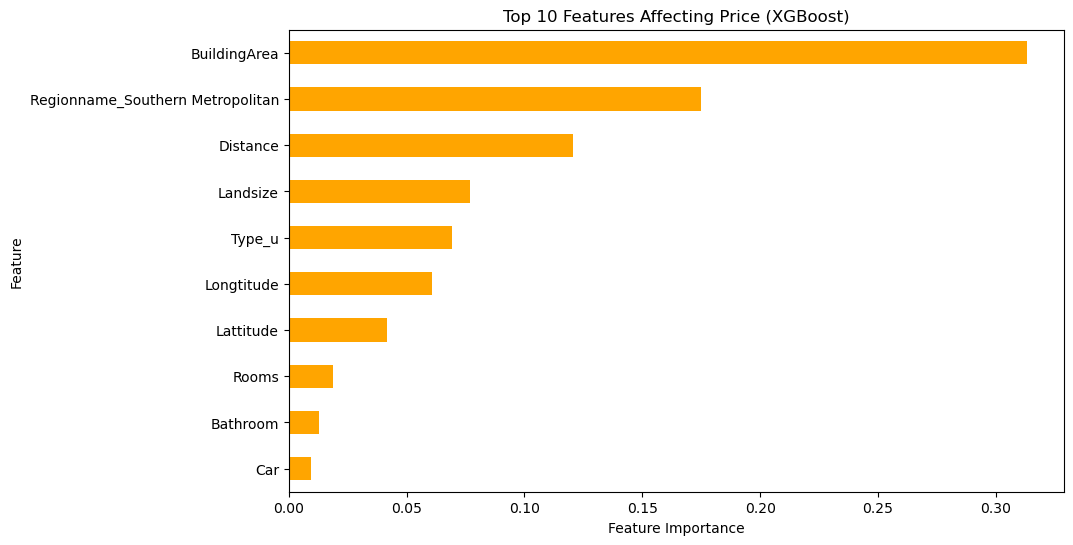

In [67]:
# Get feature importances
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Select top 10 features
top_features = feat_importance.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Features Affecting Price (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [68]:
y_pred_rf = rf_model.predict(X_test)
n = X_test.shape[0]

# Standard metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# RMSE and MAE as percentage of mean price
rmse_pct_rf = (rmse_rf / y_test.mean()) * 100
mae_pct_rf = (mae_rf / y_test.mean()) * 100

# Print results
print(f"Random Forest Regression Results:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f} ({rmse_pct_rf:.2f}%)")
print(f"MAE: {mae_rf:.2f} ({mae_pct_rf:.2f}%)")
print(f"R² Score: {r2_rf:.3f}")

Random Forest Regression Results:
MSE: 61287441507.04
RMSE: 247563.01 (22.84%)
MAE: 154632.72 (14.27%)
R² Score: 0.840


### --------------- XGBoost ----------------

In [69]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=-1, num_parallel_tree=None, ...)

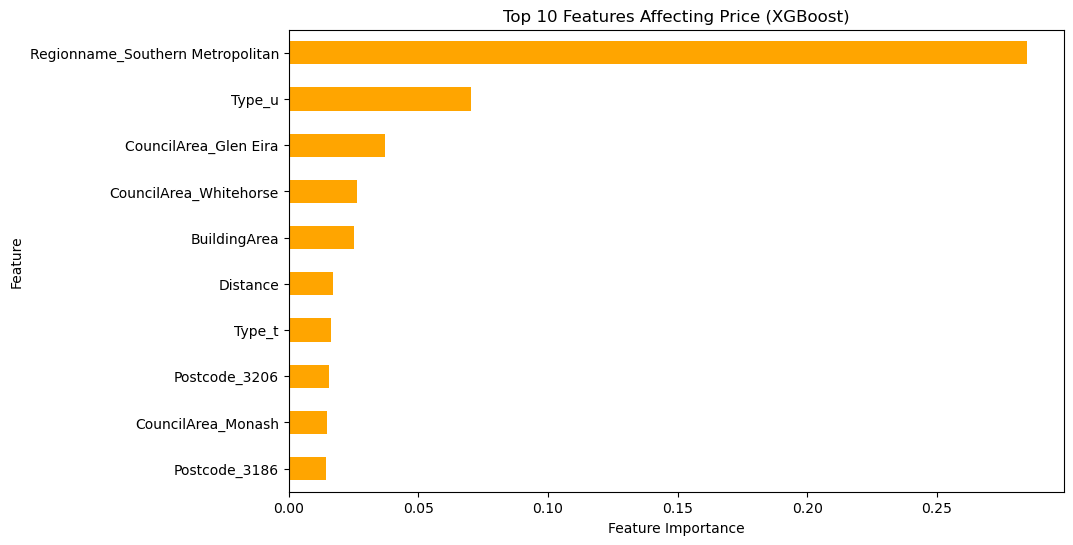

In [70]:
# Get feature importances
feat_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Select top 10 features
top_features = feat_importance.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Features Affecting Price (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [71]:
y_pred_xgb = xgb_model.predict(X_test)
n = X_test.shape[0]

# Standard metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# RMSE and MAE as percentage of mean price
rmse_pct_xgb = (rmse_xgb / y_test.mean()) * 100
mae_pct_xgb = (mae_xgb / y_test.mean()) * 100

# Print results
print(f"XGBoost Regression Results:")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f} ({rmse_pct_xgb:.2f}%)")
print(f"MAE: {mae_xgb:.2f} ({mae_pct_xgb:.2f}%)")
print(f"R² Score: {r2_xgb:.3f}")

XGBoost Regression Results:
MSE: 56134017196.70
RMSE: 236926.19 (21.86%)
MAE: 150791.66 (13.91%)
R² Score: 0.853
